## Naive Bayesian
분류 문제, 베이즈 정리 Bayes' theorem에 따라 확률계산을 하지만, 변인 간에 독립적, 즉 naive한 관계를 가정하고 적용.\
비연속적/연속적, 이진적/다항적, 사전확률

- 베이지안 Bayesian 은 확률이란 불확실한 사건에 대한 주관이나 믿은에 따라 확률이 정해진다고 생각한다. 사전확률을 정하고 주어지는 증거에 따라 갱신, 사후확률을 추정한다. 평균 값을 추정을 할 경우, 그 값은 불확실하며 분포에 따라 신뢰구간 내에 존재할 수도 있고 없을 수도 있다. 

### 베이지안 추론
$P(\theta|D) = \frac{P(D|\theta) P(\theta)}{P(D)}$
P(D)는 사후확률을 확률분포로 만들게 하는 정규화 상수, P(D)로 나누어주면 사후확률분포의 합이 1이 되게 한다.

$P(\theta|D) \propto P(D|\theta) \cdot P(\theta)$
즉 사후확률은 ∝ 가능도 × 사전확률로 계산

#### 사전 확률
어떤 사건이 얼마나 발생할 것인지 아무런 증거도 없는 상황에서 개인적인 믿음.\
사전확률을 모르는 경우, 균등분포를 따른다고 가정. 

#### 가능도 likelihood
독립적: 사건의 발생이 서로 영향이 없다.

$ P(x)=\frac{count(x) + \alpha}{N + \alpha \vert x \vert}$
>count(x) x의 발생건수
|x|는 발생가능한 사건의 수
$\alpha$는 조절변수. 0이면 조절이 없게 되고, 1이면 add-one smoothing
N은 x의 총발생건수

example: 전체 3개 가우넫 3개 모두 스팸 메세지인 경우 \
$ \frac{3 + 2 }{3 + 2 \times 2}= \frac {5}{7}$

- 흰공W 이고, B2에서 나왔을 확률  𝑃(𝐴=𝐵2|𝐵=𝑊) 을 계산
|      | 흰공W | 검은공B |
| ----------- | ----------- | ----------- |
| 가방 B1      | 2       | 2 |
| 가방 B2   | 1        | 2 |


- 조건부확률로 계산하면:

$
\begin{align}
P(A \vert B) = \frac{P(A \cap B)}{P(B)} = \frac{P(A) \times P(B)}{P(B)}
\end{align}
$

$P(A=B2|B=W) =\frac{P(B2\ and\ W)}{P(W)} = \frac{1/7}{3/7}=1/3$

- 베이지안으로 계산하면:

$P(A=B2|B=W)=\frac{P(W|B2) P(B2)}{P(W)} = \frac{(1/3)(3/7)}{(3/7)}=1/3$

In [2]:
#튜플 리스트
import numpy as np
_x = np.array([
        ('m', 'b', 1),
        ('m', 's', 1),
        ('g', 'q', 1),
        ('h', 's', 1),
        ('g', 'q', 1),
        ('g', 'q', 0),
        ('g', 's', 0),
        ('h', 'b', 0),
        ('h', 'q', 0),
        ('m', 'b', 0)],
        dtype=[('A', 'U1'), ('B', 'U1'), ('C', 'i1')
])
#데이터형 dtype의 'U'는 유니코드 문자열, 뒤 숫자는 자릿수를 의미

In [3]:
print(_x)

[('m', 'b', 1) ('m', 's', 1) ('g', 'q', 1) ('h', 's', 1) ('g', 'q', 1)
 ('g', 'q', 0) ('g', 's', 0) ('h', 'b', 0) ('h', 'q', 0) ('m', 'b', 0)]


In [5]:
print(_x['A'])

print(_x[_x['A']=='m'])

['m' 'm' 'g' 'h' 'g' 'g' 'g' 'h' 'h' 'm']
[('m', 'b', 1) ('m', 's', 1) ('m', 'b', 0)]


### 문제1: 
사후확률 post_c1 (c=1)
A=m이고 B=q일 경우, Pr(C=1)를 구해보자
dictionary 활용

In [11]:
#C컬럼에 있는 key 별로 개수를 센다. groupby C

import collections
prior_kc = collections.defaultdict(int)
for item in _x['C']:
    prior_kc[item]+=1

In [12]:

print ('prior key counts computed: {}'.format(prior_kc))

prior key counts computed: defaultdict(<class 'int'>, {1: 5, 0: 5})


In [13]:
#defaultdict(int)에 저장된 키, 빈도로 부터 확률을 계산한다.

allFreq=sum(prior_kc.values())
prior_c=dict()
for k,v in prior_kc.items():
    prior_c[k]=float(v)/allFreq
print ("prior_c: {}".format(prior_c))

prior_c: {1: 0.5, 0: 0.5}


a=m 이고 c=1

In [31]:
aLikelihood_a_c1 = _x['A'][_x['C']==1]
kc_a_c1 = collections.defaultdict(int)
for item in aLikelihood_a_c1:
    kc_a_c1[item]+=1
print ('kc_a_c1 key counts computed: {}',format(kc_a_c1))

kc_a_c1 key counts computed: {} defaultdict(<class 'int'>, {'m': 2, 'g': 2, 'h': 1})


In [32]:
allFreq=sum(kc_a_c1.values())
prior_a_c=dict()
for k,v in kc_a_c1.items():
    prior_a_c[k]=float(v)/allFreq
print ("prior_a_c: {}".format(prior_a_c))

prior_a_c: {'m': 0.4, 'g': 0.4, 'h': 0.2}


b=q, c=1

In [33]:
aLikelihood_b_c1 = _x['B'][_x['C']==1]
kc_b_c1 = collections.defaultdict(int)
for item in aLikelihood_b_c1:
    kc_b_c1[item]+=1
print ('kc_b_c1 key counts computed: {}',format(kc_b_c1))

kc_b_c1 key counts computed: {} defaultdict(<class 'int'>, {'b': 1, 's': 2, 'q': 2})


In [34]:
allFreq=sum(kc_b_c1.values())
prior_b_c=dict()
for k,v in kc_b_c1.items():
    prior_b_c[k]=float(v)/allFreq
print ("prior_b_c: {}".format(prior_b_c))

prior_b_c: {'b': 0.2, 's': 0.4, 'q': 0.4}


In [35]:
print ("prior_c: {}".format(prior_c))
print ("prob_a_c: {}".format(prior_a_c))
print ("prob_b_c: {}".format(prior_b_c))

prior_c: {1: 0.5, 0: 0.5}
prob_a_c: {'m': 0.4, 'g': 0.4, 'h': 0.2}
prob_b_c: {'b': 0.2, 's': 0.4, 'q': 0.4}


In [39]:
post_c1=prior_c[1]*prior_a_c['m']*prior_b_c['q']
print(post_c1)

0.08000000000000002


### 문제2:
 A=m이고 B=q일 경우, Pr(C=0)를 구해보자, 개수만을 세어서 계산

In [40]:
prior_c0 = np.count_nonzero(_x['C']==0)/_x.shape[0]

In [41]:
prob_am_c0=np.count_nonzero(_x['A'][_x['C']==0] == 'm')/np.count_nonzero(_x['C']==0)

In [42]:

prob_bq_c0=np.count_nonzero(_x['B'][_x['C']==0] == 'q')/np.count_nonzero(_x['C']==0)

In [43]:
post_c0 = prior_c0 * prob_am_c0 * prob_bq_c0
f"post_cf:{post_c0:.3f}"

'post_cf:0.040'

## Binomial Bayesian 이항 베이지안

사건이 이진적일 경우에 적용, 발생 빈도가 아니라 발생여부만 측정. \
$p(\theta|D) = \frac{p(D|\theta) p(\theta)}{p(D)}$

사전 확률은 베타분포를 따른다\
사전확률 $P(\theta)$이 베타분포를 따르면 $\theta \sim Beta(\alpha, \beta)$, 사후확률도 베타분포를 따르게 된다 $\theta \sim Beta(k+\alpha, n-k+\beta)$

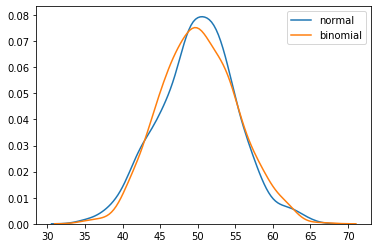

In [44]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(random.normal(loc=50, scale=5, size=1000), label='normal')
#loc= 평균, scale = 표준편차

sns.kdeplot(random.binomial(100, p=0.5, size=1000), label='binomial')
#100번 시도, 확률=0.5, 

In [45]:
from scipy import special
n=6
k=0
p=0.5
print(special.comb(6,k,exact=True)*(p**k)*((1-p)**(n-k)))

0.015625


In [47]:
for i in range(7):
    print ("Pr(X = {} heads)= {:.5f}".format(i, special.comb(6, i, exact=True)*(p**i)*( (1-p)**(n-i) ) ) )

Pr(X = 0 heads)= 0.01562
Pr(X = 1 heads)= 0.09375
Pr(X = 2 heads)= 0.23438
Pr(X = 3 heads)= 0.31250
Pr(X = 4 heads)= 0.23438
Pr(X = 5 heads)= 0.09375
Pr(X = 6 heads)= 0.01562


In [48]:

import scipy.stats as stats
for i in range(7):
    print ("{:.5f}".format(stats.binom.pmf(i,6,0.5)))

0.01563
0.09375
0.23438
0.31250
0.23438
0.09375
0.01563


확률의 확률분포를 그려보자.

- 앞서 사전확률은 $\theta \sim Beta(\alpha=1, \beta=1)$
- n=100회 던져서 k=70회가 앞면이 나왔다고 하면 가능도는 $\theta \sim Beta(\alpha=70,\beta=100-70)=Beta(\alpha=70, \beta=30)$
-앞서 사후확률은 $\theta \sim Beta(\alpha=70+1, \beta=100-70+1)=Beta(\alpha=71, \beta=31)$

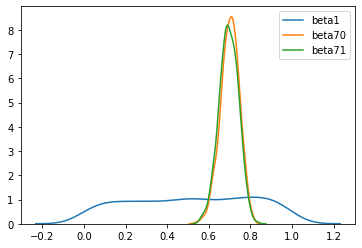

In [50]:
#처음 확률이 다 비슷비슷함.
sns.kdeplot(random.beta(a=1, b=1, size=1000), label='beta1') #prior a=1, b=1
#70번을 던지니까 분포가 70에 기울임
sns.kdeplot(random.beta(a=70, b=30, size=1000), label='beta70') #likelihood a=70, b=100-70 (n=100, k=30)
sns.kdeplot(random.beta(a=71, b=31, size=1000), label='beta71') #posterior a=70+1, b=100-70+1
plt.show()

그림에서 보듯이, 사후확률의 분포는 오른쪽으로 움직이고 폭이 더욱 좁아졌다. 이는 100에서 70회가 앞면이 나왔다는 사실에 더욱 확신이 증가했다는 의미이다. 평균은0.696 표준편차는 0.045, 그러니까 동전은 69.6%는 앞면이 나올 것이, 표준편차는 불과 0.045라는 의미

In [51]:
import math

a=71 #posterior a=70+1, b=100-70+1 (n=100, k=30)
b=31
mu=a/(a+b)
std=math.sqrt(a*b/(math.pow(a+b,2)*(a+b+1)))
f"mean: {mu:.3f} std:{std:.3f}"

'mean: 0.696 std:0.045'

In [52]:
import numpy as np

city_list = ["Seoul", "Jongro", "Sydney", "Gangnam", "NY"]
feature1 = [1, 0, 0, 0, 0]
feature2 = [0, 1, 0, 1, 0]
feature3 = [0, 0, 1, 0, 0]
feature4 = [0, 0, 0, 1, 0]
feature5 = [0, 0, 1, 0, 1]
feature6 = [1, 1, 0, 0, 0]
labels = [1, 1, 0, 1, 0, 1] #한국이면 1, 외국이면 0

trainData = np.array([feature1, feature2, feature3, feature4, feature5, feature6])
print(trainData)

[[1 0 0 0 0]
 [0 1 0 1 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 1 0 1]
 [1 1 0 0 0]]


In [53]:
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB()
clf.fit(trainData, labels)
clf.predict(trainData)

array([1, 1, 0, 1, 0, 1])

In [54]:
testData_1=np.array([[0, 0, 1, 1, 1], [1, 0, 0, 1, 0], [1, 1, 1, 1, 0]])
clf.predict(testData_1)

array([0, 1, 1])

In [58]:
#testData에 대해 정확성을 측정하려면, label 데이터를 넣어주어야 한다
print(clf.score(trainData, labels))
print(clf.score(testData_1, [0, 1, 1]))

1.0
1.0


In [59]:
#predict_proba()는 확률추정치를 출력한다.

clf.predict_proba(trainData) #likelihood 를 얼마나 배정했는지

array([[0.09194098, 0.90805902],
       [0.03264813, 0.96735187],
       [0.8200225 , 0.1799775 ],
       [0.09194098, 0.90805902],
       [0.95795007, 0.04204993],
       [0.03264813, 0.96735187]])

In [60]:
clf.predict_proba(testData_1)

array([[0.88363636, 0.11636364],
       [0.03264813, 0.96735187],
       [0.14438503, 0.85561497]])

## Normal Bayesian 정규분포 베이지안
연속적인 값 구분하는 문제, 정규 분포 사용.

- 정규분포의 확률밀도함수 (pdf, Probability Dense Function)

$\frac{\displaystyle 1}{\displaystyle \sigma \sqrt{2\pi}}
e^{-\frac{\displaystyle 1}{\displaystyle 2}(\frac{\displaystyle x-\mu}{\displaystyle \sigma})^2}$

In [61]:
#튜플로
import numpy as np
_hwf = np.array([
        ('male',6,180,12),
        ('male',5.92,190,11),
        ('male',5.58,170,12),
        ('male',5.92,165,10),
        ('female',5,100,6),
        ('female',5.5,150,8),
        ('female',5.42,130,7),
        ('female',5.75,150,9)],
        dtype=[('sex', 'U6'), ('height', 'f4'), ('weight', 'i4'), ('foot', 'i4')
])

In [68]:
_hwf

array([('male', 6.  , 180, 12), ('male', 5.92, 190, 11),
       ('male', 5.58, 170, 12), ('male', 5.92, 165, 10),
       ('female', 5.  , 100,  6), ('female', 5.5 , 150,  8),
       ('female', 5.42, 130,  7), ('female', 5.75, 150,  9)],
      dtype=[('sex', '<U6'), ('height', '<f4'), ('weight', '<i4'), ('foot', '<i4')])

In [62]:
#남녀 확률 반반
pr_m=0.5
pr_f=0.5

In [63]:
import pandas as pd

pdf = pd.DataFrame(_hwf)
pdf.groupby('sex').mean()

,height,weight,foot
sex,,,
female,5.4175,132.50,7.50
male,5.8550,176.25,11.25


In [64]:
pdf.groupby('sex').std()

,height,weight,foot
sex,,,
female,0.311809,23.629078,1.290994
male,0.187172,11.086779,0.957427


In [65]:
#python 함수로
def normpdf(x, mu=0, std=1):
    n = float(x-mu) / abs(std)
    g = np.exp(-n*n/2) / (abs(std) * np.sqrt(2*np.pi))
    return g

In [66]:
mean_h_m = _hwf['height'][_hwf['sex']=='male'].mean()
std_h_m = _hwf['height'][_hwf['sex']=='male'].std(ddof=1)

pr_h_m=normpdf(6, mean_h_m, std_h_m)
f"Pr(Height|Male): {pr_h_m:.4f}, mean_h_m: {mean_h_m:.4f}, std_h_m: {std_h_m:.4f}"

'Pr(Height|Male): 1.5789, mean_h_m: 5.8550, std_h_m: 0.1872'

### 사후 확률

$
posterior(M)=\frac{P(M)\ p(height|M)\ p(weight|M)\ p(foot size|M)}{evidence}\\
$

#### sklearn 이용

In [67]:
X=_hwf[:][['height', 'weight', 'foot']]
y=_hwf[:]['sex']

In [69]:
#list 튜플 바로 넘겨주면 오류, 2차원으로 바꿔줘야함.

X = [list(x) for x in X]
print(X)

[[6.0, 180, 12], [5.92, 190, 11], [5.58, 170, 12], [5.92, 165, 10], [5.0, 100, 6], [5.5, 150, 8], [5.42, 130, 7], [5.75, 150, 9]]


In [70]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X, y)
Y_gnb_score = gnb.predict_proba(X)

In [71]:
Y_gnb_score

array([[1.01445408e-06, 9.99998986e-01],
       [1.68038573e-05, 9.99983196e-01],
       [7.74236193e-05, 9.99922576e-01],
       [5.73512178e-03, 9.94264878e-01],
       [1.00000000e+00, 4.96400751e-27],
       [9.99992023e-01, 7.97745444e-06],
       [1.00000000e+00, 2.62669718e-12],
       [9.82692514e-01, 1.73074857e-02]])

>0~3까지는 남자라서 우측이 크고, 4~7까지는 여자라서 왼쪽이 크다.

In [72]:
#평균
print(gnb.theta_)
#표준편차
print(gnb.sigma_)

[[  5.41750002 132.5          7.5       ]
 [  5.85500002 176.25        11.25      ]]
[[7.29194841e-02 4.18750001e+02 1.25000073e+00]
 [2.62757494e-02 9.21875007e+01 6.87500734e-01]]


In [73]:
gnb.predict([[6,130,8],[6,180,12]])

array(['female', 'male'], dtype='<U6')